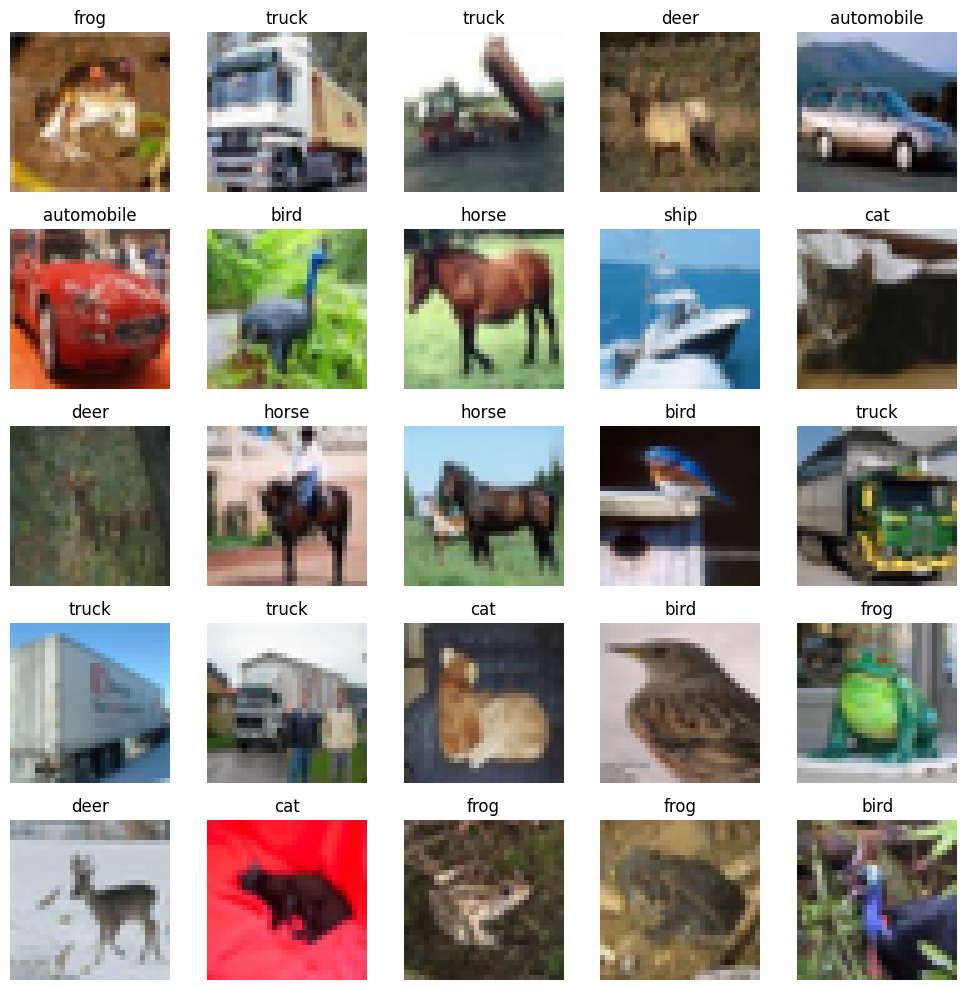

In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(train_images, train_labels), (_, _) = cifar10.load_data()

# Define a list of class names (for CIFAR-10)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a grid of images
plt.figure(figsize=(10, 10))
num_rows, num_cols = 5, 5  # Adjust as needed

for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.5263 - accuracy: 0.4433 - val_loss: 1.2642 - val_accuracy: 0.5362
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1501 - accuracy: 0.5921 - val_loss: 1.0908 - val_accuracy: 0.6172
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9976 - accuracy: 0.6483 - val_loss: 0.9826 - val_accuracy: 0.6584
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8952 - accuracy: 0.6865 - val_loss: 0.9495 - val_accuracy: 0.6754
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8224 - accuracy: 0.7127 - val_loss: 0.8569 - val_accuracy: 0.7027
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7577 - accuracy: 0.7352 - val_loss: 0.8716 - val_accuracy: 0.6929
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7038 - accuracy: 0.7539 - val_loss: 0.9382 -

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 5s - loss: 0.8692 - accuracy: 0.7152 - 5s/epoch - 16ms/step
Test accuracy: 0.7152000069618225


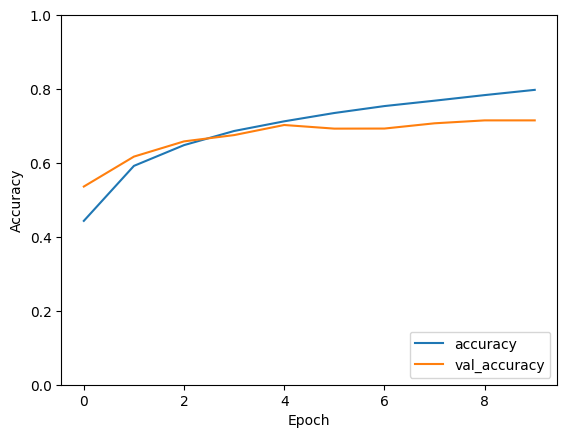

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
